# Data Visualisation and Analysis

In [1]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
data = unpickle('datasets/cifar10/cifar-10-batches-py/data_batch_1')
data

{b'batch_label': b'training batch 1 of 5',
 b'labels': [6,
  9,
  9,
  4,
  1,
  1,
  2,
  7,
  8,
  3,
  4,
  7,
  7,
  2,
  9,
  9,
  9,
  3,
  2,
  6,
  4,
  3,
  6,
  6,
  2,
  6,
  3,
  5,
  4,
  0,
  0,
  9,
  1,
  3,
  4,
  0,
  3,
  7,
  3,
  3,
  5,
  2,
  2,
  7,
  1,
  1,
  1,
  2,
  2,
  0,
  9,
  5,
  7,
  9,
  2,
  2,
  5,
  2,
  4,
  3,
  1,
  1,
  8,
  2,
  1,
  1,
  4,
  9,
  7,
  8,
  5,
  9,
  6,
  7,
  3,
  1,
  9,
  0,
  3,
  1,
  3,
  5,
  4,
  5,
  7,
  7,
  4,
  7,
  9,
  4,
  2,
  3,
  8,
  0,
  1,
  6,
  1,
  1,
  4,
  1,
  8,
  3,
  9,
  6,
  6,
  1,
  8,
  5,
  2,
  9,
  9,
  8,
  1,
  7,
  7,
  0,
  0,
  6,
  9,
  1,
  2,
  2,
  9,
  2,
  6,
  6,
  1,
  9,
  5,
  0,
  4,
  7,
  6,
  7,
  1,
  8,
  1,
  1,
  2,
  8,
  1,
  3,
  3,
  6,
  2,
  4,
  9,
  9,
  5,
  4,
  3,
  6,
  7,
  4,
  6,
  8,
  5,
  5,
  4,
  3,
  1,
  8,
  4,
  7,
  6,
  0,
  9,
  5,
  1,
  3,
  8,
  2,
  7,
  5,
  3,
  4,
  1,
  5,
  7,
  0,
  4,
  7,
  5,
  5,
  1,
  0,
  9,
  6,
  9,
 

<b>data</b>: 10000x3072 np array. each row stores a 32x32 colour image. first 1024 entries contain red values, next 1024 green, next 1024 blue (RGB values).

translation into english:

10000 images. each row is an image.<br>
each row/image has 3072 numbers (we call these numbers entries).<br>
3072 = 1024 * 3<br>
32 * 32 = 1024. every value is the rgb value of the corresponding color (r, g, or b) i think <br>
So,<br>
[1024 entries, 1024 entries, 1024 entries] <br>
first is red, second is green, third is blue.

<b>labels:</b> 10000 numbers, ranging from 0-9. The number at index i corresponds to the image at index i in <b>data</b>.

In [12]:
images = data[b'data']
images

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [13]:
images.shape

(10000, 3072)

In [6]:
import numpy as np

labels = np.array(data[b'labels'])
labels

array([6, 9, 9, ..., 1, 1, 5])

In [10]:
labels.shape

(10000,)

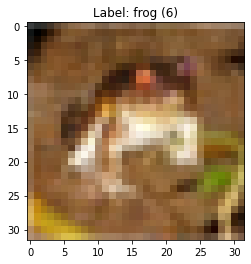

In [21]:
import matplotlib.pyplot as plt

first_image = images[0].reshape(3, 32, 32).transpose(1, 2, 0)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.imshow(first_image)
plt.title(f"Label: {class_names[labels[0]]} ({labels[0]})")
plt.show()

In [19]:
first_image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

## notes
since all images are 3x32x32, we just take that as the model's input dims?

In [18]:
first_image.shape

(32, 32, 3)

# End of data visualisation. Restarted kernel here, and began proper.

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [2]:
class CIFAR10Dataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx].reshape(3, 32, 32).transpose(1, 2, 0)
        label = self.labels[idx]

        # Normalize image to [0, 1] range
        image = image / 255.0

        if self.transform:
            image = self.transform(image)

        return torch.tensor(image, dtype=torch.float32).permute(2, 0, 1), torch.tensor(label, dtype=torch.long)

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
def load_cifar10(data_dir):
    images = []
    labels = []
    
    # for all 6 data batches
    for i in range(1, 6):
        batch = unpickle(f"{data_dir}/data_batch_{i}")
        images.append(batch[b'data'])
        labels.extend(batch[b'labels'])

    test_batch = unpickle(f"{data_dir}/test_batch")
    test_images = test_batch[b'data']
    test_labels = test_batch[b'labels']

    # Combine training batches
    train_images = np.vstack(images)
    train_labels = np.array(labels)
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)

    return train_images, train_labels, test_images, test_labels

## Creating a custom dataset.
<b>Reference: </b>https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [5]:
data_dir = 'datasets/cifar10/cifar-10-batches-py'

In [6]:
train_images, train_labels, test_images, test_labels = load_cifar10(data_dir)

In [7]:
train_dataset = CIFAR10Dataset(train_images, train_labels)
test_dataset = CIFAR10Dataset(test_images, test_labels)

In [8]:
train_dataset

In [9]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=0)

# CNN Architecture
### Changes:
`self.fc1 = nn.Linear(128 * 16 * 16, 256)` becomes <br>
`self.fc1 = nn.Linear(128 * 4 * 4, 256)`

`self.fc2 = nn.Linear(256, 2)` becomes <br>
`self.fc2 = nn.Linear(256, 10)`

In [10]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # ReLU, MaxPool, and dropout
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
        self.dropout = nn.Dropout(p=0.5)
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(
            in_channels=3, 
            out_channels=32, 
            kernel_size=5, 
            stride=1,
            padding=2
        )
        self.bn1 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(32, 64, 5, 1, 2)
        self.bn2 = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.bn3 = nn.BatchNorm2d(128)
        
        # fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        # 32x32 -> 16x16
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        # 16x16 -> 8x8
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        # 8x8 -> 4x4
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

In [13]:
# Instantiate the model
model = CNN().to(device)

# Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

# Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

import time
from datetime import timedelta
from tqdm import tqdm

num_epochs = 30

total_start_time = time.time()

# for record keeping purposes to plot graph later on
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    epoch_start_time = time.time()
    
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{num_epochs}"):
        images = images.to(device)
        labels = labels.to(device)

        # 1. zero gradient of the optimizer
        optimizer.zero_grad()

        # 2. model outputs
        outputs = model(images)
        
        # 3. let the loss function calculate loss
        loss = criterion(outputs, labels)
        
        # 4. loss backward
        loss.backward()
        
        # 5. optimizer step
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = 100 * correct / total

    # testing/validation
    model.eval()
    test_running_loss = 0.0
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            test_running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_loss = test_running_loss / len(test_loader.dataset)
    test_acc = 100 * test_correct / test_total
    
    # add to record keeping purposes
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    epoch_end_time = time.time()
    epoch_duration = epoch_end_time - epoch_start_time
    epoch_duration_formatted = str(timedelta(seconds=int(epoch_duration)))

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}%, "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%, "
          f"Time: {epoch_duration_formatted}")

total_end_time = time.time()
total_training_time = total_end_time - total_start_time
total_training_time_formatted = str(timedelta(seconds=int(total_training_time)))
print(f"Total Training Time: {total_training_time_formatted}")

Training Epoch 1/30: 100%|██████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 205.98it/s]


Epoch [1/30], Train Loss: 1.5110, Train Acc: 45.24%, Test Loss: 1.1861, Test Acc: 57.48%, Time: 0:00:04


Training Epoch 2/30: 100%|██████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 223.80it/s]


Epoch [2/30], Train Loss: 1.1308, Train Acc: 60.03%, Test Loss: 1.0431, Test Acc: 62.87%, Time: 0:00:03


Training Epoch 3/30: 100%|██████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 200.10it/s]


Epoch [3/30], Train Loss: 0.9836, Train Acc: 65.17%, Test Loss: 1.1626, Test Acc: 59.68%, Time: 0:00:04


Training Epoch 4/30: 100%|██████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 199.77it/s]


Epoch [4/30], Train Loss: 0.8963, Train Acc: 68.52%, Test Loss: 0.8853, Test Acc: 68.92%, Time: 0:00:04


Training Epoch 5/30: 100%|██████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 197.77it/s]


Epoch [5/30], Train Loss: 0.8271, Train Acc: 71.22%, Test Loss: 0.8539, Test Acc: 70.32%, Time: 0:00:04


Training Epoch 6/30: 100%|██████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 204.21it/s]


Epoch [6/30], Train Loss: 0.7702, Train Acc: 73.14%, Test Loss: 0.9056, Test Acc: 67.82%, Time: 0:00:04


Training Epoch 7/30: 100%|██████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 200.47it/s]


Epoch [7/30], Train Loss: 0.7207, Train Acc: 74.81%, Test Loss: 0.7815, Test Acc: 73.27%, Time: 0:00:04


Training Epoch 8/30: 100%|██████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 188.04it/s]


Epoch [8/30], Train Loss: 0.6820, Train Acc: 76.47%, Test Loss: 0.7346, Test Acc: 74.73%, Time: 0:00:04


Training Epoch 9/30: 100%|██████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 176.10it/s]


Epoch [9/30], Train Loss: 0.6433, Train Acc: 77.59%, Test Loss: 0.7232, Test Acc: 75.15%, Time: 0:00:05


Training Epoch 10/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:04<00:00, 178.90it/s]


Epoch [10/30], Train Loss: 0.6065, Train Acc: 78.94%, Test Loss: 0.7376, Test Acc: 74.49%, Time: 0:00:04


Training Epoch 11/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 221.02it/s]


Epoch [11/30], Train Loss: 0.5778, Train Acc: 79.76%, Test Loss: 0.7397, Test Acc: 74.86%, Time: 0:00:03


Training Epoch 12/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 224.57it/s]


Epoch [12/30], Train Loss: 0.5386, Train Acc: 81.03%, Test Loss: 0.7583, Test Acc: 73.74%, Time: 0:00:03


Training Epoch 13/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 225.09it/s]


Epoch [13/30], Train Loss: 0.5103, Train Acc: 82.13%, Test Loss: 0.6834, Test Acc: 76.65%, Time: 0:00:03


Training Epoch 14/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 217.04it/s]


Epoch [14/30], Train Loss: 0.4818, Train Acc: 83.10%, Test Loss: 0.7054, Test Acc: 76.18%, Time: 0:00:04


Training Epoch 15/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 200.54it/s]


Epoch [15/30], Train Loss: 0.4564, Train Acc: 84.12%, Test Loss: 0.6966, Test Acc: 76.61%, Time: 0:00:04


Training Epoch 16/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 212.13it/s]


Epoch [16/30], Train Loss: 0.4264, Train Acc: 85.20%, Test Loss: 0.7289, Test Acc: 75.51%, Time: 0:00:04


Training Epoch 17/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 224.38it/s]


Epoch [17/30], Train Loss: 0.4055, Train Acc: 85.84%, Test Loss: 0.8400, Test Acc: 73.00%, Time: 0:00:03


Training Epoch 18/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 222.91it/s]


Epoch [18/30], Train Loss: 0.3799, Train Acc: 86.78%, Test Loss: 0.7463, Test Acc: 75.28%, Time: 0:00:03


Training Epoch 19/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 219.67it/s]


Epoch [19/30], Train Loss: 0.3565, Train Acc: 87.59%, Test Loss: 0.7054, Test Acc: 76.69%, Time: 0:00:04


Training Epoch 20/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 221.27it/s]


Epoch [20/30], Train Loss: 0.3340, Train Acc: 88.32%, Test Loss: 0.8619, Test Acc: 73.33%, Time: 0:00:03


Training Epoch 21/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 221.02it/s]


Epoch [21/30], Train Loss: 0.3140, Train Acc: 89.16%, Test Loss: 0.8119, Test Acc: 74.50%, Time: 0:00:03


Training Epoch 22/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 224.06it/s]


Epoch [22/30], Train Loss: 0.2947, Train Acc: 89.63%, Test Loss: 0.7380, Test Acc: 76.60%, Time: 0:00:03


Training Epoch 23/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 223.03it/s]


Epoch [23/30], Train Loss: 0.2728, Train Acc: 90.67%, Test Loss: 0.7915, Test Acc: 76.26%, Time: 0:00:03


Training Epoch 24/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 223.67it/s]


Epoch [24/30], Train Loss: 0.2620, Train Acc: 90.92%, Test Loss: 0.7999, Test Acc: 75.73%, Time: 0:00:03


Training Epoch 25/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 223.07it/s]


Epoch [25/30], Train Loss: 0.2481, Train Acc: 91.40%, Test Loss: 0.8157, Test Acc: 75.57%, Time: 0:00:03


Training Epoch 26/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 216.99it/s]


Epoch [26/30], Train Loss: 0.2316, Train Acc: 91.97%, Test Loss: 0.7968, Test Acc: 76.62%, Time: 0:00:04


Training Epoch 27/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 218.24it/s]


Epoch [27/30], Train Loss: 0.2129, Train Acc: 92.58%, Test Loss: 0.8480, Test Acc: 76.09%, Time: 0:00:04


Training Epoch 28/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 218.54it/s]


Epoch [28/30], Train Loss: 0.2028, Train Acc: 92.96%, Test Loss: 0.9005, Test Acc: 74.97%, Time: 0:00:04


Training Epoch 29/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 222.90it/s]


Epoch [29/30], Train Loss: 0.1888, Train Acc: 93.43%, Test Loss: 0.9142, Test Acc: 75.43%, Time: 0:00:03


Training Epoch 30/30: 100%|█████████████████████████████████████████████████████████| 782/782 [00:03<00:00, 206.62it/s]


Epoch [30/30], Train Loss: 0.1827, Train Acc: 93.71%, Test Loss: 0.8369, Test Acc: 76.24%, Time: 0:00:04
Total Training Time: 0:02:04


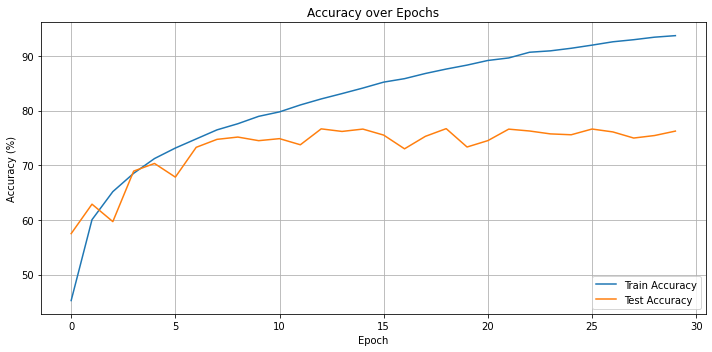

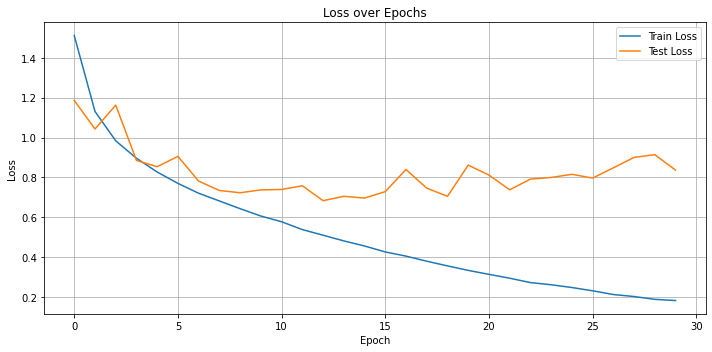

In [15]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy over Epochs')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true, y_pred, target_names=class_names))

[[741  31  39  23  20   4   9   8  93  32]
 [ 10 876   2   8   2   2   5   2  26  67]
 [ 56  12 633  64  70  53  60  27  12  13]
 [ 18  12  51 652  47 116  49  19  18  18]
 [ 13   5  61  65 727  19  48  37  18   7]
 [ 12   9  34 204  33 621  25  43  12   7]
 [  8  11  30  71  23  12 828   2   7   8]
 [ 13   3  29  47  52  45   3 787   4  17]
 [ 26  20   4   9   6   3   5   0 911  16]
 [ 20  76   3   8   1   2   8   3  31 848]]
              precision    recall  f1-score   support

    airplane       0.81      0.74      0.77      1000
  automobile       0.83      0.88      0.85      1000
        bird       0.71      0.63      0.67      1000
         cat       0.57      0.65      0.61      1000
        deer       0.74      0.73      0.73      1000
         dog       0.71      0.62      0.66      1000
        frog       0.80      0.83      0.81      1000
       horse       0.85      0.79      0.82      1000
        ship       0.80      0.91      0.85      1000
       truck       0.82     

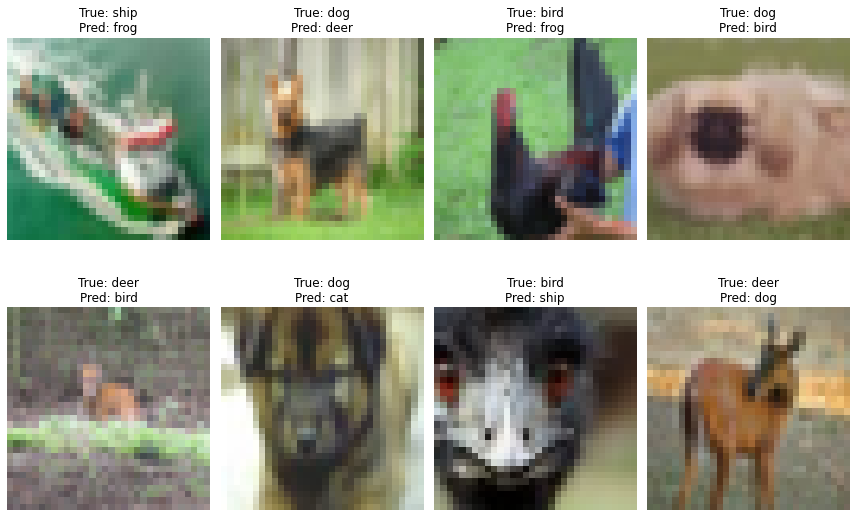

In [19]:
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Identify misclassified images
        incorrect = (predicted != labels)
        if incorrect.any():
            # Collect misclassified images and labels
            misclassified_images.extend(images[incorrect].cpu())
            misclassified_labels.extend(labels[incorrect].cpu())
            misclassified_preds.extend(predicted[incorrect].cpu())
            

# Plot a few misclassified images
num_images = 8  # Number of images to display
plt.figure(figsize=(12, 8))
for idx in range(num_images):
    if idx >= len(misclassified_images):
        break
    img = misclassified_images[idx]
    true_label = misclassified_labels[idx].item()
    pred_label = misclassified_preds[idx].item()

    plt.subplot(2, 4, idx+1)
    img = img.numpy().transpose((1, 2, 0))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")
plt.tight_layout()
plt.show()